<a href="https://colab.research.google.com/github/sugam0301/LGMVIP-Data-Analytics/blob/main/LGMVIP_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                            LETS GROW MORE 

## DATA SCIENCE INERNSHIP

## BY: SUGAM MEHTA

## EDA TERRORISM

### Find out the hot zone of terrorism

###Derive security issue and insights

#### IMPORTING LIBRARIES

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### IMPORTING DATASET

In [ ]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Global Terrorism\\globalterrorismdb_0718dist.csv",encoding='latin1')
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


### Cleaning Dataset

In [ ]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

### Setting appropriate column names

In [ ]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [ ]:
df.sample(5)

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
28212,1986,6,1,Peru,Tacna,South America,Palca,-17.777883,-69.959507,Armed Assault,5.0,0.0,Military Unit,NaN,Shining Path (SL),Military,Firearms,NaN
98481,2010,10,1,Somalia,Lower Juba,Sub-Saharan Africa,Kismayo,-0.357847,42.546650,Unarmed Assault,0.0,3.0,Three civilians,"10/01/2010: On Friday, in Kismayu, Jubbada Hoo...",Al-Shabaab,Private Citizens & Property,Melee,The specific motive for the attack was to puni...
36107,1988,11,1,United States,Puerto Rico,North America,Rio Piedras,18.386932,-66.061127,Bombing/Explosion,0.0,0.0,General Electric administrative offices in Rio...,"11/1/1988: In a series of two related attacks,...",Pedro Albizu Campos Revolutionary Forces,Business,Explosives,To raise awareness to the culpability of Ameri...
135480,2014,7,24,Afghanistan,Herat,South Asia,Herat,34.346722,62.197315,Armed Assault,2.0,0.0,Finnish Aid Workers,07/24/2014: Assailants on a motorcycle opened ...,Unknown,NGO,Firearms,NaN
150532,2015,7,12,United Kingdom,Northern Ireland,Western Europe,Londonderry,55.011562,-7.312045,Armed Assault,0.0,0.0,Fire Fighting Crew,07/12/2015: Assailants threw incendiary device...,Unknown,Other,Incendiary,NaN


### Choosing required columns for analysis

In [ ]:
df.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

### Checking for Null Values

In [ ]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)

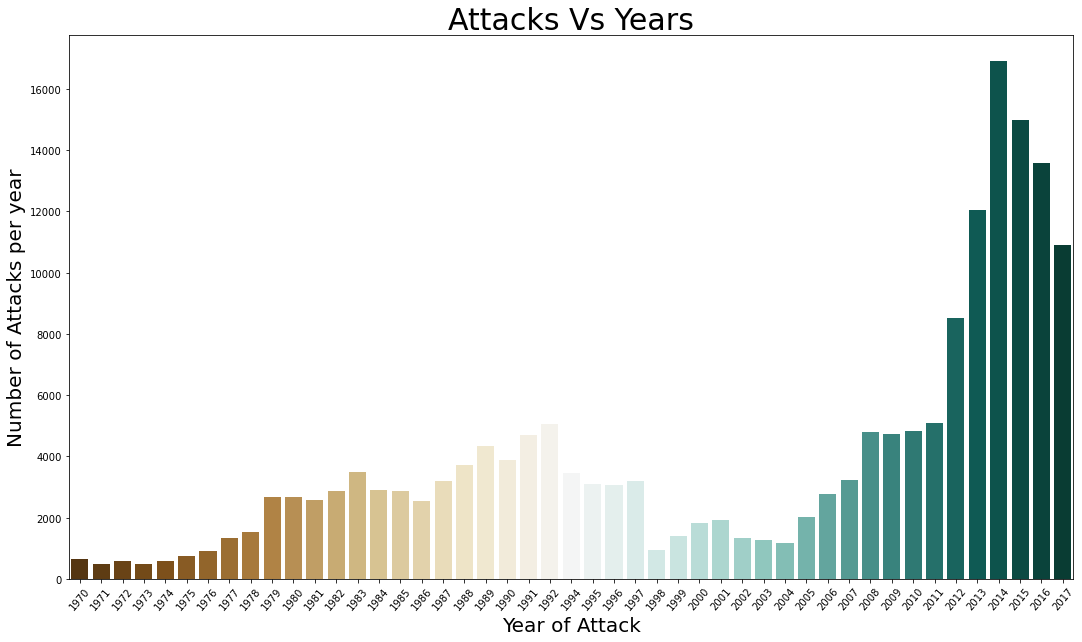

In [ ]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "BrBG")
plt.xticks(rotation = 50)
plt.xlabel('Year of Attack',fontsize=20)
plt.ylabel('Number of Attacks per year',fontsize=20)
plt.title('Attacks Vs Years',fontsize=30)
plt.show()

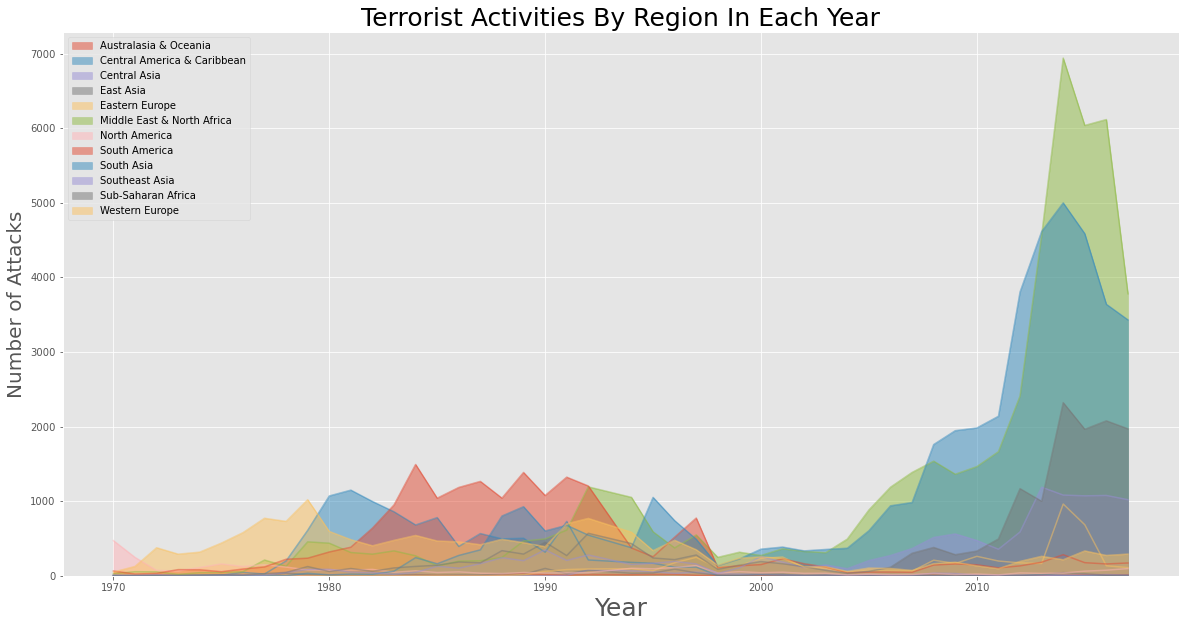

In [ ]:
from matplotlib import style
style.use("ggplot")
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=25)
plt.legend()
plt.show()

### Top Affected Countries

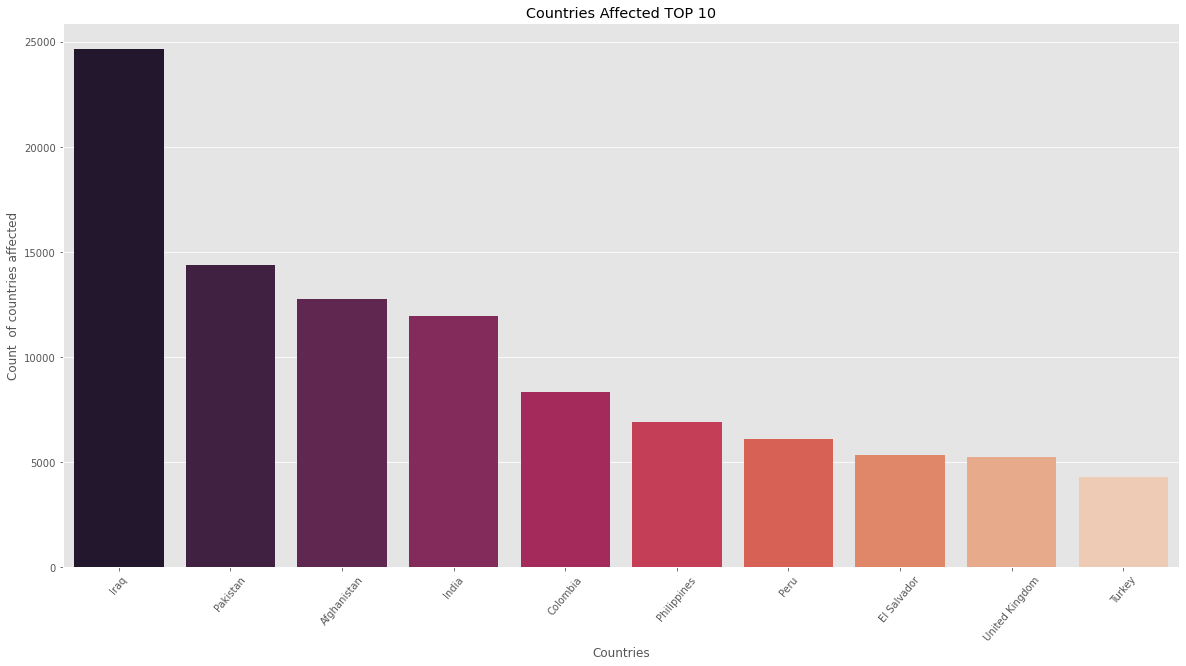

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette="rocket")
plt.title('Countries Affected TOP 10')
plt.xlabel('Countries')
plt.ylabel('Count  of countries affected')
plt.xticks(rotation = 50)
plt.show()


### Deaths due to attack

In [ ]:
dataset=df[['Year','kill']].groupby(['Year']).sum()
dataset

,kill
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0
1975,617.0
1976,674.0
1977,456.0
1978,1459.0


### Killings with Different Attack Type

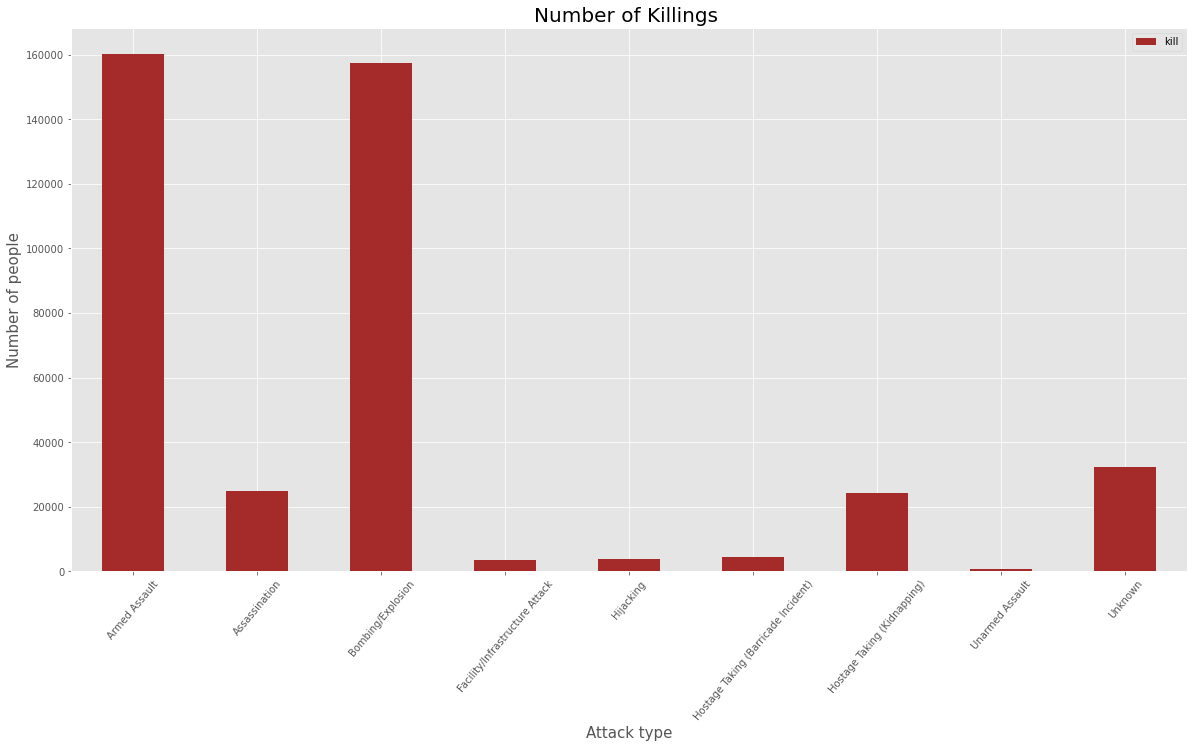

In [ ]:
df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['brown'])
plt.xticks(rotation=50)
plt.title("Number of Killings ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

### Top Terrorist Groups

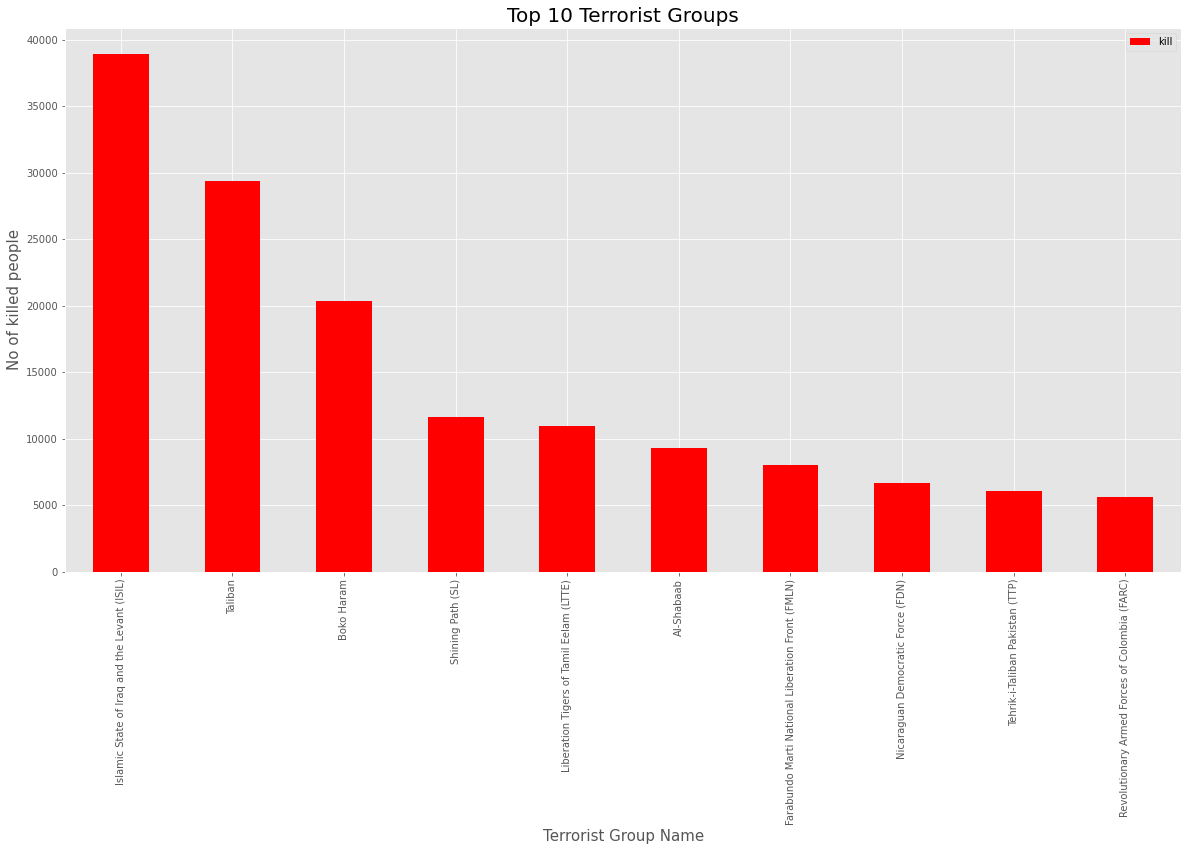

In [ ]:
df[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 Terrorist Groups",fontsize=20)
plt.xlabel("Terrorist Group Name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

### Places Target type

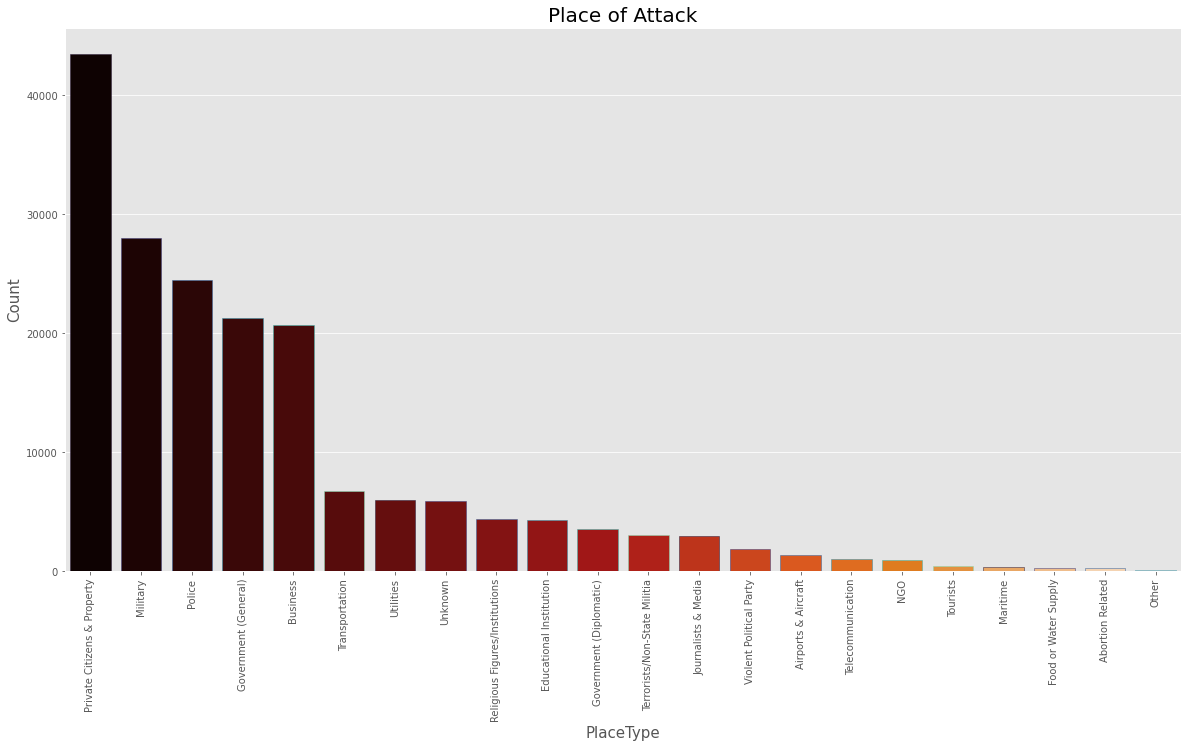

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(df["Targettype"],order=df['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("PlaceType",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Place of Attack",fontsize=20)
plt.show()

In [ ]:
dataset=df[['Group','Country','kill']]
dataset=dataset.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
dataset

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


### Count of different Attack Types

In [ ]:
typeKill = df.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


Analysis

Country most attacked : Iraq

Most affected year : 2014

Maximum deaths in the year: 2014

Global attack rose sharply starting year 2011

Most targetted places are private citizes,military,police etc

Most Attack Types: Bombing/Explosion

City with the most attacks: Baghdad

Top terrorist attack : Islamic State of Iraq and the Levant (ISIL)